# Pricing NBA Arena Seats

### 1. Data Preprocessing

In [ ]:
# LISTING DATA EXPLORATORY ANALYSIS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### library imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
seat_df = pd.read_csv("/content/drive/MyDrive/NBA capstone/2024-03-06 Seat Coordinates.csv")
seat_df.head()

,HOME_TEAM_TRI_CODE,SECTION_ROW_SEAT_NAME,SEAT_CENTER_X,SEAT_CENTER_Y
0,GSW,BALCONY 1 - ROW 01 - SEAT 1,134,2220
1,GSW,BALCONY 1 - ROW 01 - SEAT 2,134,2244
2,GSW,BALCONY 1 - ROW 01 - SEAT 3,134,2268
3,GSW,BALCONY 1 - ROW 01 - SEAT 4,134,2292
4,GSW,BALCONY 2 - ROW 01 - SEAT 1,134,2796


In [ ]:
listing_df = pd.read_csv("/content/drive/MyDrive/NBA capstone/2024-03-06 Listing Data.csv")
listing_df.head()

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY
1,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 26,SEAT 2,SECTION 124 - ROW 26 - SEAT 2,480.0,0.0,EVENT DAY
2,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 20,SEAT 3,SECTION 124 - ROW 20 - SEAT 3,470.0,0.0,EVENT DAY
3,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 114,ROW 11,SEAT 8,SECTION 114 - ROW 11 - SEAT 8,595.0,0.0,EVENT DAY
4,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,NON-PREMIUM,UPPER BOWL,LEVEL 200,SECTION 221,ROW 21,SEAT 8,SECTION 221 - ROW 21 - SEAT 8,300.0,0.0,EVENT DAY


In [ ]:
nba_df = pd.merge(listing_df, seat_df, on='SECTION_ROW_SEAT_NAME', how='left')
nba_df.head()

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE_x,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY,HOME_TEAM_TRI_CODE_y,SEAT_CENTER_X,SEAT_CENTER_Y
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY,GSW,2674.0,3604.0
1,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 26,SEAT 2,SECTION 124 - ROW 26 - SEAT 2,480.0,0.0,EVENT DAY,GSW,1366.0,3577.0
2,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 20,SEAT 3,SECTION 124 - ROW 20 - SEAT 3,470.0,0.0,EVENT DAY,GSW,1446.0,3436.0
3,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 114,ROW 11,SEAT 8,SECTION 114 - ROW 11 - SEAT 8,595.0,0.0,EVENT DAY,GSW,2962.0,1522.0
4,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,NON-PREMIUM,UPPER BOWL,LEVEL 200,SECTION 221,ROW 21,SEAT 8,SECTION 221 - ROW 21 - SEAT 8,300.0,0.0,EVENT DAY,GSW,2146.0,548.0


In [ ]:
nba_df.isna().sum()

GAME_ID                            0
GAME_DATE                          0
GAME_TIME                          0
SEASON_ID                          0
SEASON_STAGE                       0
VISITOR_TEAM_TRI_CODE              0
HOME_TEAM_TRI_CODE_x               0
SECTION_CATEGORY                  96
SECTION_GROUP                      0
SECTION_LEVEL                      0
SECTION_NAME                       0
ROW_NAME                           0
SEAT_NAME                          0
SECTION_ROW_SEAT_NAME              0
TICKET_LISTING_PRICE               0
DAYS_INVENTORY_LEAD_TIME           0
INVENTORY_LEAD_TIME_CATEGORY       0
HOME_TEAM_TRI_CODE_y            5130
SEAT_CENTER_X                   5130
SEAT_CENTER_Y                   5130
dtype: int64

In [ ]:
print(len(nba_df))

459306


#### a. Let's fix the missing data

In [ ]:
nba_df.columns

Index(['GAME_ID', 'GAME_DATE', 'GAME_TIME', 'SEASON_ID', 'SEASON_STAGE',
       'VISITOR_TEAM_TRI_CODE', 'HOME_TEAM_TRI_CODE_x', 'SECTION_CATEGORY',
       'SECTION_GROUP', 'SECTION_LEVEL', 'SECTION_NAME', 'ROW_NAME',
       'SEAT_NAME', 'SECTION_ROW_SEAT_NAME', 'TICKET_LISTING_PRICE',
       'DAYS_INVENTORY_LEAD_TIME', 'INVENTORY_LEAD_TIME_CATEGORY',
       'HOME_TEAM_TRI_CODE_y', 'SEAT_CENTER_X', 'SEAT_CENTER_Y'],
      dtype='object')

In [ ]:
nba_df.drop(columns='HOME_TEAM_TRI_CODE_y', inplace=True)
nba_df.rename(columns={'HOME_TEAM_TRI_CODE_x': 'HOME_TEAM_TRI_CODE'}, inplace=True)

KeyError: "['HOME_TEAM_TRI_CODE_y'] not found in axis"

#### b. Investigate Distribution

In [ ]:
correlation_matrix = nba_df[['SEAT_CENTER_X', 'SEAT_CENTER_Y', 'TICKET_LISTING_PRICE']].corr()
print(correlation_matrix)

                      SEAT_CENTER_X  SEAT_CENTER_Y  TICKET_LISTING_PRICE
SEAT_CENTER_X              1.000000       0.041441             -0.023033
SEAT_CENTER_Y              0.041441       1.000000             -0.011067
TICKET_LISTING_PRICE      -0.023033      -0.011067              1.000000


#### c. Spatial Interpolation

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
coordinates = nba_df[['SEAT_CENTER_X', 'SEAT_CENTER_Y']]
filled_coordinates = imputer.fit_transform(coordinates)
nba_df['SEAT_CENTER_X'], nba_df['SEAT_CENTER_Y'] = filled_coordinates[:, 0], filled_coordinates[:, 1]


In [ ]:
nba_df.head()

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,SECTION_NAME,ROW_NAME,SEAT_NAME,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY,SEAT_CENTER_X,SEAT_CENTER_Y
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 104,ROW 16,SEAT 11,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY,2674.0,3604.0
1,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 26,SEAT 2,SECTION 124 - ROW 26 - SEAT 2,480.0,0.0,EVENT DAY,1366.0,3577.0
2,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 124,ROW 20,SEAT 3,SECTION 124 - ROW 20 - SEAT 3,470.0,0.0,EVENT DAY,1446.0,3436.0
3,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,SECTION 114,ROW 11,SEAT 8,SECTION 114 - ROW 11 - SEAT 8,595.0,0.0,EVENT DAY,2962.0,1522.0
4,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,NON-PREMIUM,UPPER BOWL,LEVEL 200,SECTION 221,ROW 21,SEAT 8,SECTION 221 - ROW 21 - SEAT 8,300.0,0.0,EVENT DAY,2146.0,548.0


### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'])
nba_df['DAY_OF_WEEK'] = nba_df['GAME_DATE'].dt.day_name()
nba_df['GAME_TIME'] = pd.to_datetime(nba_df['GAME_TIME'], errors='coerce').dt.strftime('%H:%M')
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

nba_df['TIME_SLOT'] = nba_df['GAME_TIME'].apply(categorize_time)

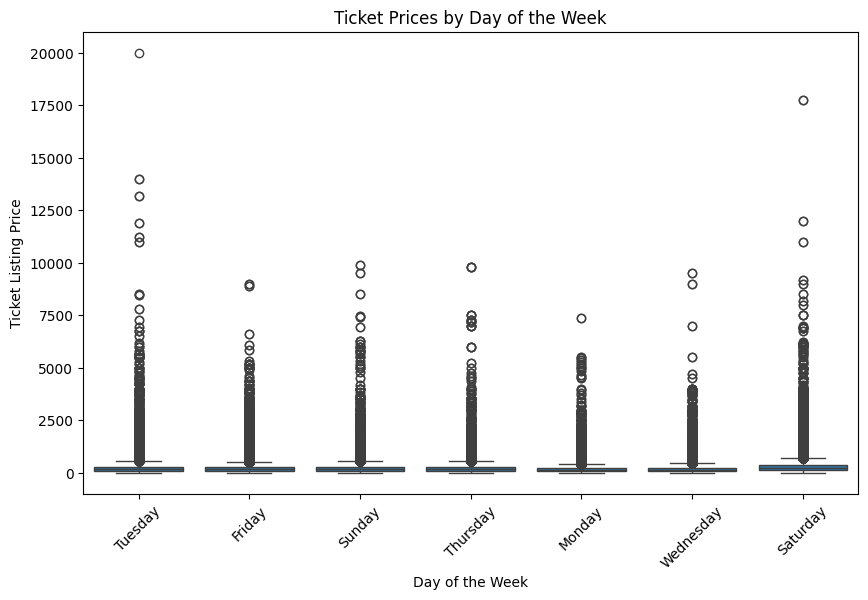

In [ ]:
# ticket prices by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY_OF_WEEK', y='TICKET_LISTING_PRICE', data=nba_df)
plt.title('Ticket Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ticket Listing Price')
plt.xticks(rotation=45)
plt.show()

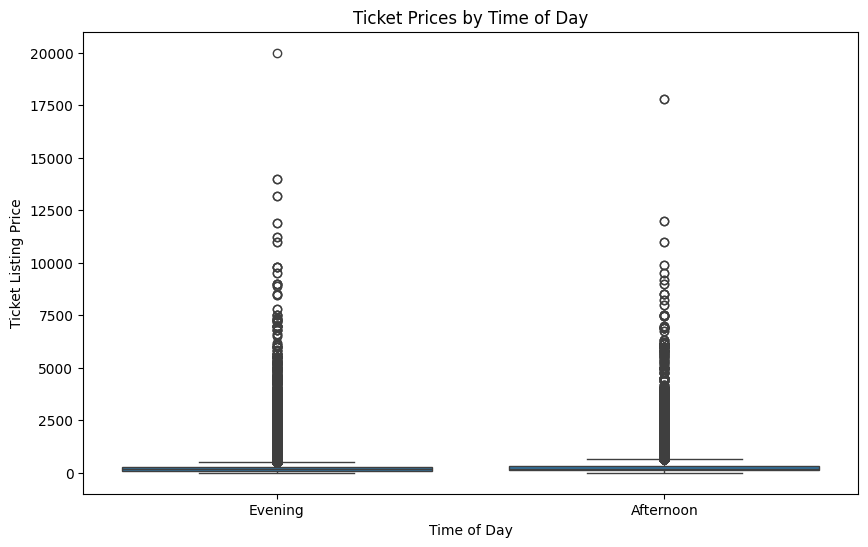

In [ ]:
# ticket prices by time slot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME_SLOT', y='TICKET_LISTING_PRICE', data=nba_df)
plt.title('Ticket Prices by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Ticket Listing Price')
plt.show()

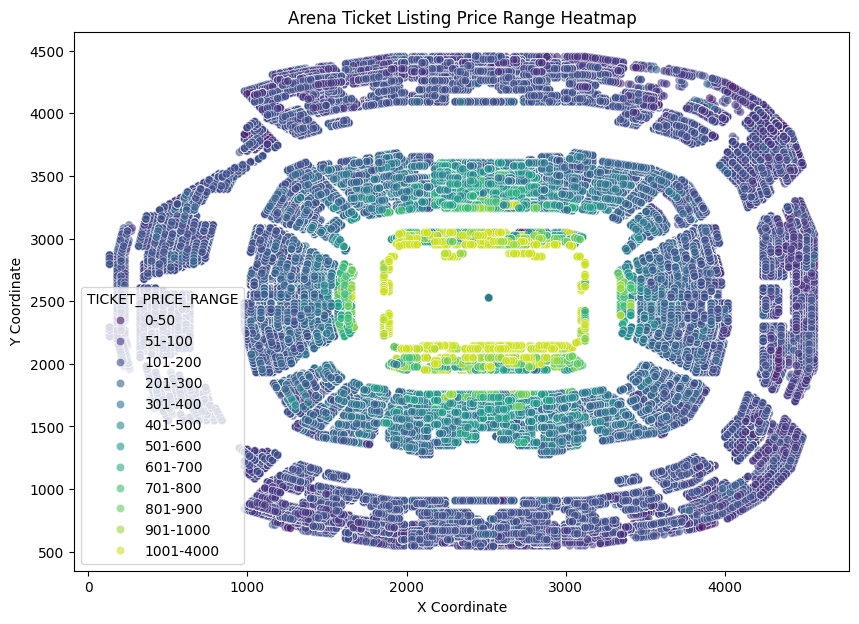

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 4000]
labels = ['0-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001-4000']
nba_df['TICKET_PRICE_RANGE'] = pd.cut(nba_df['TICKET_LISTING_PRICE'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='SEAT_CENTER_X',
    y='SEAT_CENTER_Y',
    hue='TICKET_PRICE_RANGE',
    palette='viridis',
    data=nba_df,
    alpha=0.6
)

plt.title('Arena Ticket Listing Price Range Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()
